In [29]:
import pandas as pd

df = pd.read_csv("./dataset/mtcars.csv")
df.head()   # 데이터셋의 맨앞 5개 출력

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [30]:
df.tail()   # 데이터셋의 맨뒤 5개 출력

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [31]:
df.shape    # 데이터수 32개, 컬럼은 12개

(32, 12)

In [38]:
df.rename(columns={"Unnamed: 0": "model"}, inplace=True)    # 이름이 없는 차 모델 컬럼을 model로 변경

In [39]:
df.info()   # 컬럼의 정보 출력, 모두 결측치는 없음(모두 정상적으로 데이터가 들어가있음), 자료형 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [40]:
df.dtypes   # 각 컬럼의 자료형 확인 가능

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [41]:
df.describe()   # 데이터셋의 개수, 평균, 편차, 최소/최대값 등등을 확인 가능

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [42]:
df['gear'].value_counts()   # gear 컬럼에 값 확인

gear
3    15
4    12
5     5
Name: count, dtype: int64

In [43]:
df['am'].value_counts() # transmission(am) 컬럼의 값 확인

am
0    19
1    13
Name: count, dtype: int64

In [44]:
gear_am_counts = df.groupby(['gear', 'am']).size().reset_index(name='count')    # am과 gear의 조합을 찾은 뒤, 각각 그 수를 count 컬럼에 추가
gear_am_counts

,gear,am,count
0,3,0,15
1,4,0,4
2,4,1,8
3,5,1,5


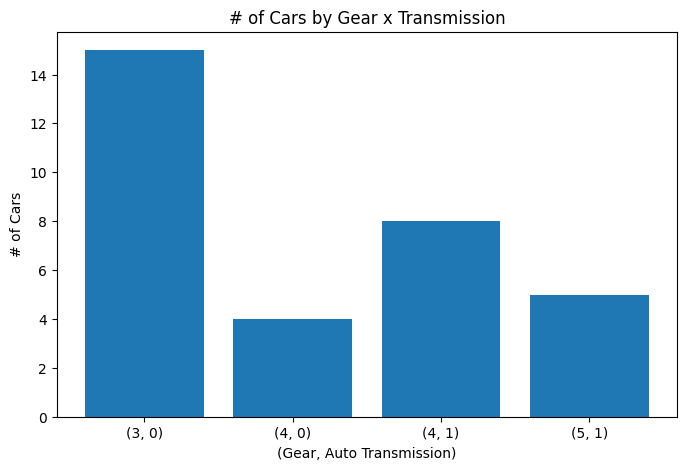

In [45]:
import matplotlib.pyplot as plt

x_labels = [f'({g}, {a})' for g, a in zip(gear_am_counts['gear'], gear_am_counts['am'])]    # x축은 gear와 transmission의 조합
y_values = gear_am_counts['count']  # y축은 차의 개수

plt.figure(figsize=(8, 5))  # 표 크기 적당히 설정
plt.bar(x_labels, y_values) # bar plot

plt.title('# of Cars by Gear x Transmission')   # 타이틀 설정
plt.xlabel('(Gear, Auto Transmission)') # x축 설정
plt.ylabel('# of Cars') # y축 설정

plt.show()

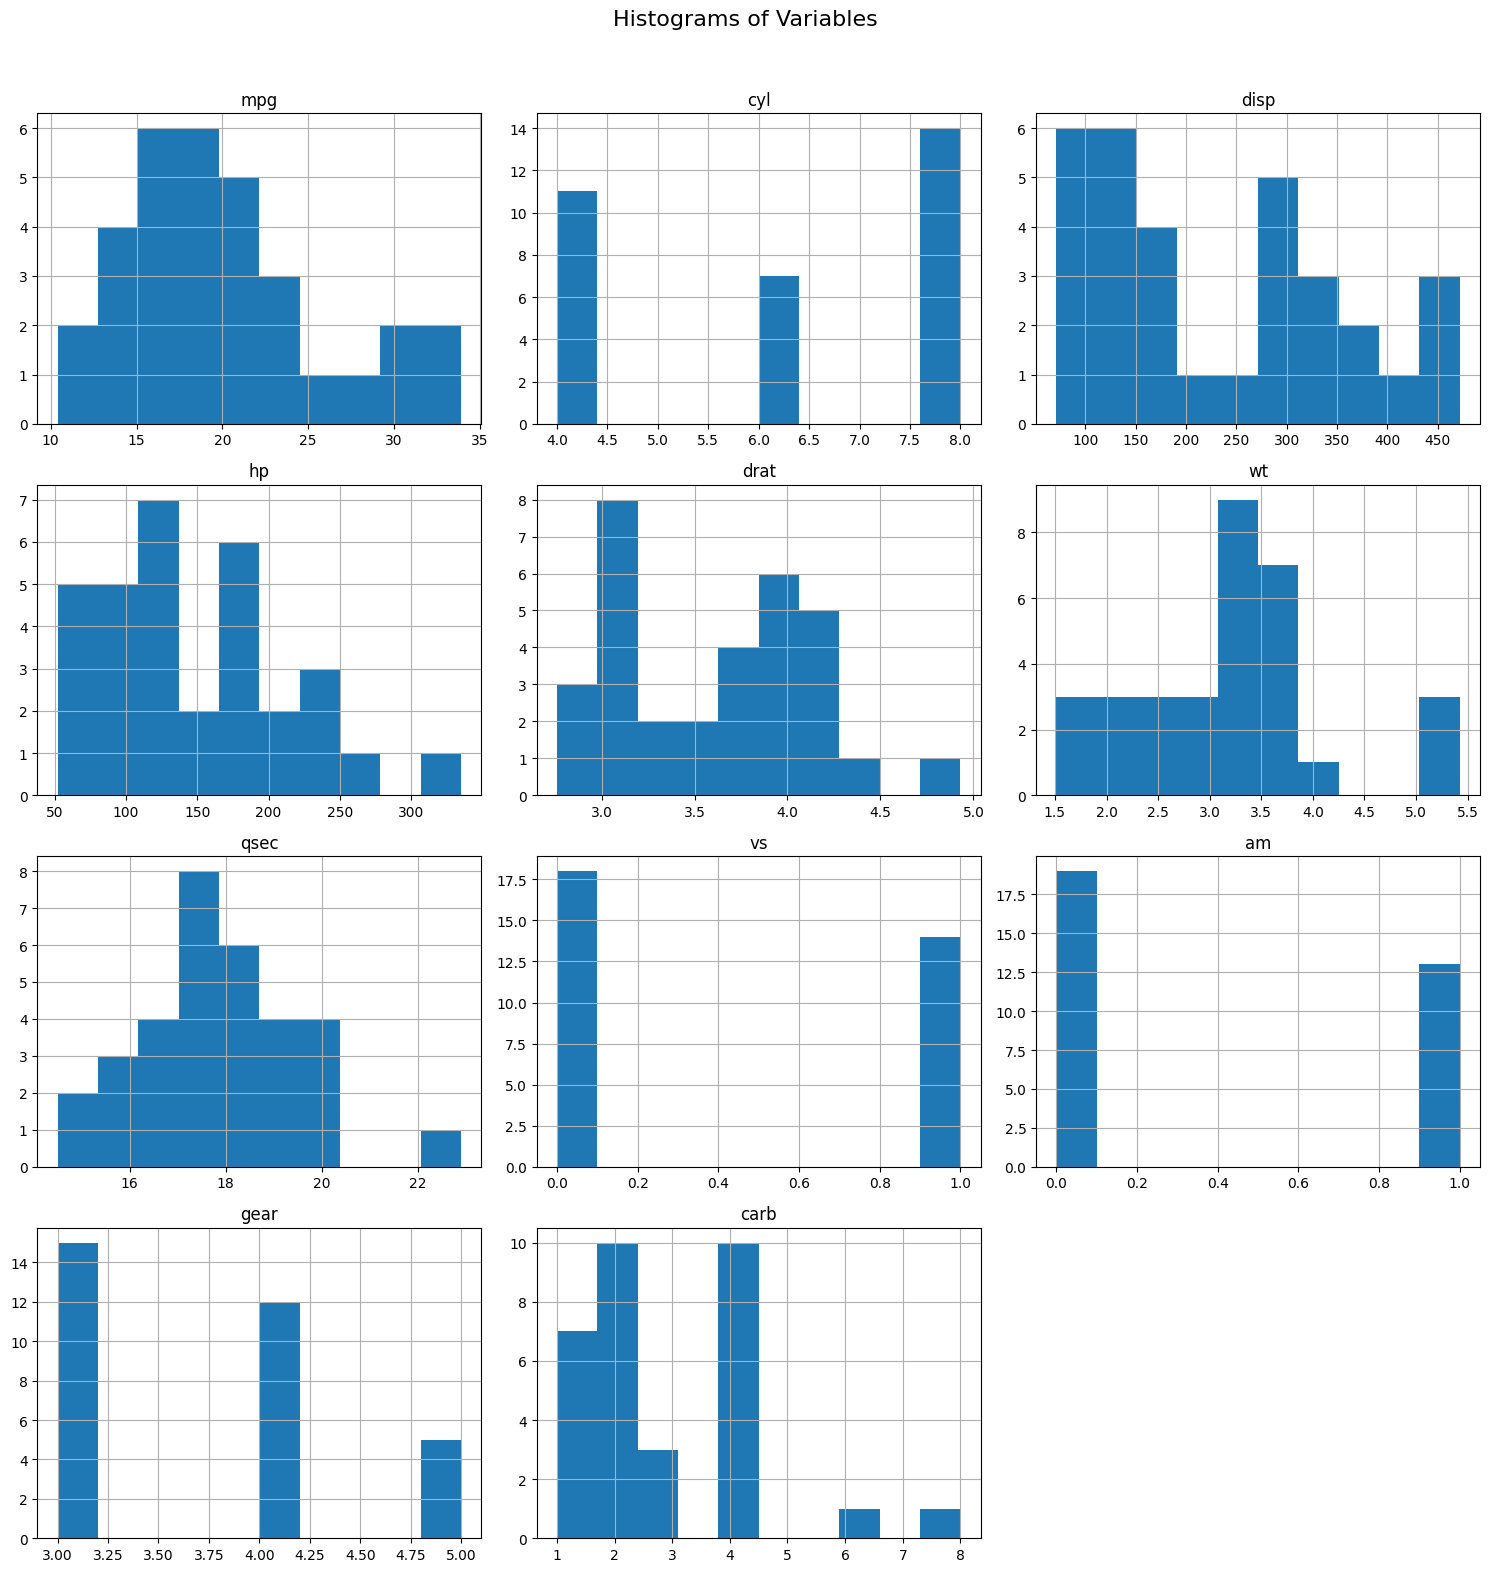

In [ ]:
# 숫자형 데이터만 선택 (object, string 등 제외(model))
numeric_df = df.select_dtypes(include=['number'])

# 그래프 개수에 맞춰 subplot 크기 자동 조정
num_cols = len(numeric_df.columns)
cols = 3  # 한 행에 3개씩
rows = (num_cols + cols - 1) // cols  # 올림 계산

plt.figure(figsize=(cols * 5, rows * 4))  # 전체 크기 설정

for i, col in enumerate(numeric_df.columns):  
    plt.subplot(rows, cols, i + 1)
    plt.hist(numeric_df[col], bins=10)
    plt.title(col)
    plt.grid(True)  # 격자표시

plt.suptitle("Histograms of Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 타이틀 공간 확보
plt.show()

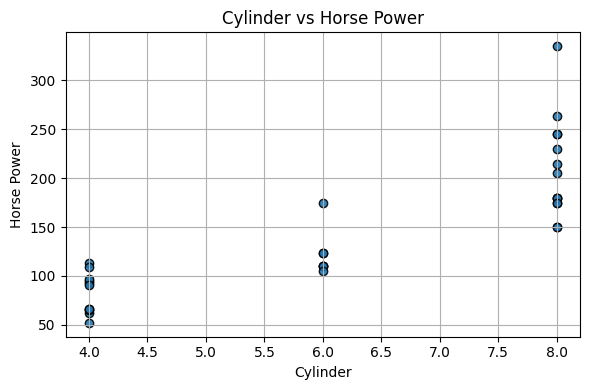

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df['cyl'], df['hp'], alpha=0.9, edgecolors='black') # cylinder와 horse power의 상관관계, 투명도는 0.9
plt.title("Cylinder vs Horse Power")    # 제목 설정
plt.xlabel("Cylinder")  # x축 설정
plt.ylabel("Horse Power")   # y축 설정
plt.grid(True)  # 격자 설정
plt.tight_layout()
plt.show()

# Cylinder와 Horse Power는 우상향하는 것으로 보임

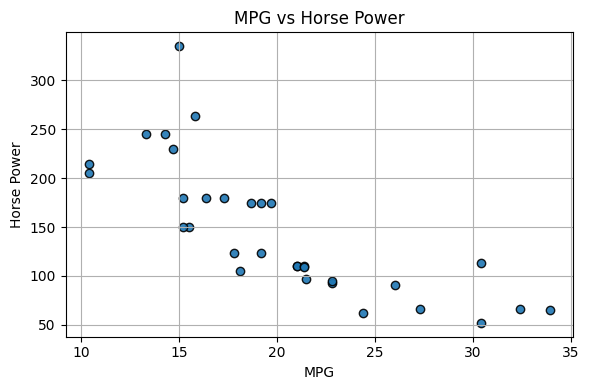

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df['mpg'], df['hp'], alpha=0.9, edgecolors='black') # MPG와 horse power의 상관관계, 투명도는 0.9
plt.title("MPG vs Horse Power")    # 제목 설정
plt.xlabel("MPG")  # x축 설정
plt.ylabel("Horse Power")   # y축 설정
plt.grid(True)  # 격자 설정
plt.tight_layout()
plt.show()

# MPG와 Horse Power는 우하향하는 것으로 보임

In [ ]:
print(numeric_df.corr(method='pearson'))    # 숫자형 컬럼만 사용하여 pearson 상관관계 출력 

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

In [ ]:
cross_tab_result = pd.crosstab(df['gear'], df['am'])    # crosstab을 사용하여 gear와 transmission의 각각의 개수 출력

print(cross_tab_result)

am     0  1
gear       
3     15  0
4      4  8
5      0  5


In [ ]:
groupby_result = df.groupby(['gear', 'am']).size().unstack(fill_value=0)    # group by와 size를 사용하여 출력, unstack: 인덱스 중 하나를 컬럼으로 바꿔서 표시, fill_value=0으로 하여 Nan값은 0처리

print(groupby_result)

am     0  1
gear       
3     15  0
4      4  8
5      0  5
